### Step 1 - Importing Libraries and reading.

In [25]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
plt.style.use('ggplot')
pd.set_option('display.max_columns', 100)#displays maximum of 100 columns instead of truncating them

In [2]:
df = pd.read_excel("/Users/mr.questionbank/Desktop/Python-Course-Work/DataFiles/student_performance_data.xlsx")

------

### Step 2 - Understanding the Data

In [3]:
df.head()

,StudentID,Name,Gender,Age,Attendance(%),ProjectsCompleted,ProjectsAssigned,ProjectCompletionRate,FinalScore,Grade,Assignment_Week1,Assignment_Week2,Assignment_Week3,Assignment_Week4,Assignment_Week5,Assignment_Week6,Assignment_Week7,Assignment_Week8,WrittenExam_Week1,WrittenExam_Week2,WrittenExam_Week3,WrittenExam_Week4,WrittenExam_Week5,WrittenExam_Week6,WrittenExam_Week7,WrittenExam_Week8
0,S01,Student_1,Male,21,73,1,3,0.33,56.0,C,4,5,10,4,8,4,10,8,42,32,18,23,20,28,34,35
1,S02,Student_2,Female,19,90,0,3,0.00,58.0,C,7,5,4,6,10,4,5,7,39,32,49,43,46,42,38,50
2,S03,Student_3,Male,23,78,0,3,0.00,48.0,D,9,7,4,8,6,4,6,5,37,16,31,40,44,19,26,24
3,S04,Student_4,Male,22,75,0,3,0.00,62.0,C,5,5,7,10,8,6,4,9,45,49,42,49,49,44,49,23
4,S05,Student_5,Male,21,64,1,3,0.33,67.0,C,5,5,10,9,7,9,8,9,44,30,44,39,30,19,47,38


In [4]:
df.columns

Index(['StudentID', 'Name', 'Gender', 'Age', 'Attendance(%)',
       'ProjectsCompleted', 'ProjectsAssigned', 'ProjectCompletionRate',
       'FinalScore', 'Grade', 'Assignment_Week1', 'Assignment_Week2',
       'Assignment_Week3', 'Assignment_Week4', 'Assignment_Week5',
       'Assignment_Week6', 'Assignment_Week7', 'Assignment_Week8',
       'WrittenExam_Week1', 'WrittenExam_Week2', 'WrittenExam_Week3',
       'WrittenExam_Week4', 'WrittenExam_Week5', 'WrittenExam_Week6',
       'WrittenExam_Week7', 'WrittenExam_Week8'],
      dtype='object')

In [5]:
df.dtypes # shows the datatype of each column.

StudentID                 object
Name                      object
Gender                    object
Age                        int64
Attendance(%)              int64
ProjectsCompleted          int64
ProjectsAssigned           int64
ProjectCompletionRate    float64
FinalScore               float64
Grade                     object
Assignment_Week1           int64
Assignment_Week2           int64
Assignment_Week3           int64
Assignment_Week4           int64
Assignment_Week5           int64
Assignment_Week6           int64
Assignment_Week7           int64
Assignment_Week8           int64
WrittenExam_Week1          int64
WrittenExam_Week2          int64
WrittenExam_Week3          int64
WrittenExam_Week4          int64
WrittenExam_Week5          int64
WrittenExam_Week6          int64
WrittenExam_Week7          int64
WrittenExam_Week8          int64
dtype: object

In [6]:
df.describe()

,Age,Attendance(%),ProjectsCompleted,ProjectsAssigned,ProjectCompletionRate,FinalScore,Assignment_Week1,Assignment_Week2,Assignment_Week3,Assignment_Week4,Assignment_Week5,Assignment_Week6,Assignment_Week7,Assignment_Week8,WrittenExam_Week1,WrittenExam_Week2,WrittenExam_Week3,WrittenExam_Week4,WrittenExam_Week5,WrittenExam_Week6,WrittenExam_Week7,WrittenExam_Week8
count,32.000000,32.00000,32.000000,32.0,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000
mean,21.187500,80.21875,1.437500,3.0,0.479375,65.156250,7.093750,7.062500,6.656250,7.593750,7.406250,6.406250,6.687500,6.718750,35.2500,34.906250,36.906250,32.56250,33.218750,33.906250,34.281250,36.250000
std,2.007044,11.15502,1.134147,0.0,0.378826,8.926616,1.956946,2.093577,2.149409,2.182916,1.738731,2.092373,2.191442,1.904737,10.9956,10.705318,10.825178,10.40452,10.496495,11.289045,11.362742,9.252724
min,18.000000,64.00000,0.000000,3.0,0.000000,48.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,15.0000,16.000000,16.000000,15.00000,15.000000,15.000000,15.000000,21.000000
25%,20.000000,71.00000,0.000000,3.0,0.000000,58.000000,5.000000,5.000000,5.000000,6.000000,6.000000,4.000000,5.000000,5.750000,25.7500,27.500000,31.750000,22.75000,26.000000,24.000000,24.750000,27.000000
50%,21.000000,77.50000,1.500000,3.0,0.500000,65.500000,7.000000,7.000000,6.000000,8.000000,7.000000,6.000000,6.000000,6.500000,38.0000,35.000000,39.500000,35.00000,34.500000,36.000000,37.500000,36.500000
75%,23.000000,90.00000,2.000000,3.0,0.670000,70.500000,9.000000,9.000000,8.250000,10.000000,9.000000,8.250000,9.000000,8.000000,44.2500,44.750000,45.250000,39.25000,42.250000,44.000000,43.500000,44.500000
max,24.000000,99.00000,3.000000,3.0,1.000000,82.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,50.0000,50.000000,49.000000,50.00000,49.000000,50.000000,50.000000,50.000000


In [7]:
df.shape #This dataset has 32 rows and 26 columns. 

(32, 26)

In [8]:
df.info() # There are no null-values here. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   StudentID              32 non-null     object 
 1   Name                   32 non-null     object 
 2   Gender                 32 non-null     object 
 3   Age                    32 non-null     int64  
 4   Attendance(%)          32 non-null     int64  
 5   ProjectsCompleted      32 non-null     int64  
 6   ProjectsAssigned       32 non-null     int64  
 7   ProjectCompletionRate  32 non-null     float64
 8   FinalScore             32 non-null     float64
 9   Grade                  32 non-null     object 
 10  Assignment_Week1       32 non-null     int64  
 11  Assignment_Week2       32 non-null     int64  
 12  Assignment_Week3       32 non-null     int64  
 13  Assignment_Week4       32 non-null     int64  
 14  Assignment_Week5       32 non-null     int64  
 15  Assignme

-----

### Data Preparation and Transformation 

Here we are preparing the dataset so that we can visualize and analyze the class performance weekwise and in total.

In [9]:
#Creating a list of columns 
Assignment_Columns = [col for col in df.columns if "Assignment" in col]
Writternexam_Columns = [col for col in df.columns if "WrittenExam" in col]

In [10]:
df['Assignment_Total'] = df[Assignment_Columns].sum(axis = 1)
df['WrittenExam_Total'] = df[Writternexam_Columns].sum(axis = 1)
df['Total_Marks'] = df['Assignment_Total'] + df['WrittenExam_Total']
df['Average_Marks'] = df['Total_Marks']/(len(Assignment_Columns)+len(Writternexam_Columns))
df['Average_Percentage'] = (df['Total_Marks']/480)*100

In [11]:
df[['Name', 'Assignment_Total', 'WrittenExam_Total', 'Total_Marks', 'Average_Marks','Average_Percentage']].head()


,Name,Assignment_Total,WrittenExam_Total,Total_Marks,Average_Marks,Average_Percentage
0,Student_1,53,232,285,17.8125,59.375000
1,Student_2,48,339,387,24.1875,80.625000
2,Student_3,49,237,286,17.8750,59.583333
3,Student_4,54,350,404,25.2500,84.166667
4,Student_5,62,291,353,22.0625,73.541667


Here, 

Each `Assignment` is evaluated out of 10. => 10 x 8 = `80`

Each `WrittenExam` is evaluated out of 50. => 50 x 8 = `400`

Therefore `Total` evaluated out of `480`

-------

###  Step 3 - Descriptive Data Analysis

#### Overall Class Stats : 
Mean, Median, Standard Deviations, min/manx and range. 

In [12]:
# Central Tendencies : 
Overall_mean = df['Total_Marks'].mean()
Overall_median = df['Total_Marks'].median()

# Measures of spread 
Overall_stddev = df['Total_Marks'].std()
Overall_variance = df['Total_Marks'].var()
Overall_range = df['Total_Marks'].max() - df['Total_Marks'].min()

In [13]:
print("Total Marks = 480")
print("Central Tendencies :")
print("Mean Marks:", Overall_mean)
print("Median Marks:", Overall_median)
print()
print("Measures of spread :")
print("Standard Deviation:", Overall_stddev)
print("Variance:", Overall_variance)
print("Range:", Overall_range)

Total Marks = 480
Central Tendencies :
Mean Marks: 332.90625
Median Marks: 326.0

Measures of spread :
Standard Deviation: 32.420980239305216
Variance: 1051.1199596774193
Range: 131


#### Weekly Analysis (stats) : 

In [ ]:
weekly_assign_avg = df[Assignment_Columns].mean()
weekly_exam_avg = df[Writternexam_Columns].mean()
print(f"\n Weekly assignment trends : {weekly_assign_avg} out of 10")
print(f"\n Weekly written exam trends : {weekly_exam_avg} out of 50")


 Weekly assignment trends : Assignment_Week1    7.09375
Assignment_Week2    7.06250
Assignment_Week3    6.65625
Assignment_Week4    7.59375
Assignment_Week5    7.40625
Assignment_Week6    6.40625
Assignment_Week7    6.68750
Assignment_Week8    6.71875
dtype: float64 out of 10

 Weekly written exam trends : WrittenExam_Week1    35.25000
WrittenExam_Week2    34.90625
WrittenExam_Week3    36.90625
WrittenExam_Week4    32.56250
WrittenExam_Week5    33.21875
WrittenExam_Week6    33.90625
WrittenExam_Week7    34.28125
WrittenExam_Week8    36.25000
dtype: float64 out of 50


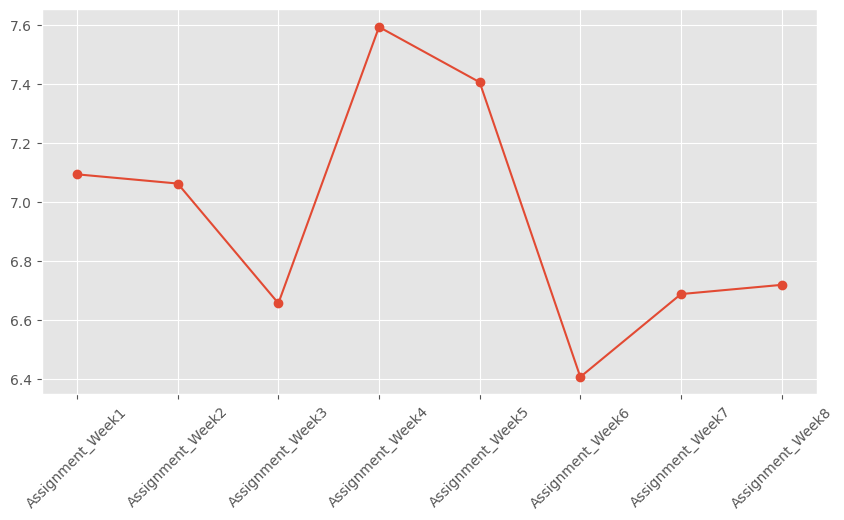

In [21]:
# Assignment Trends : 
plt.figure(figsize =(10,5))
plt.plot(weekly_assign_avg.index, weekly_assign_avg.values, marker = 'o', label = 'Assignment Trends')
plt.xticks(rotation = 45)
plt.show()

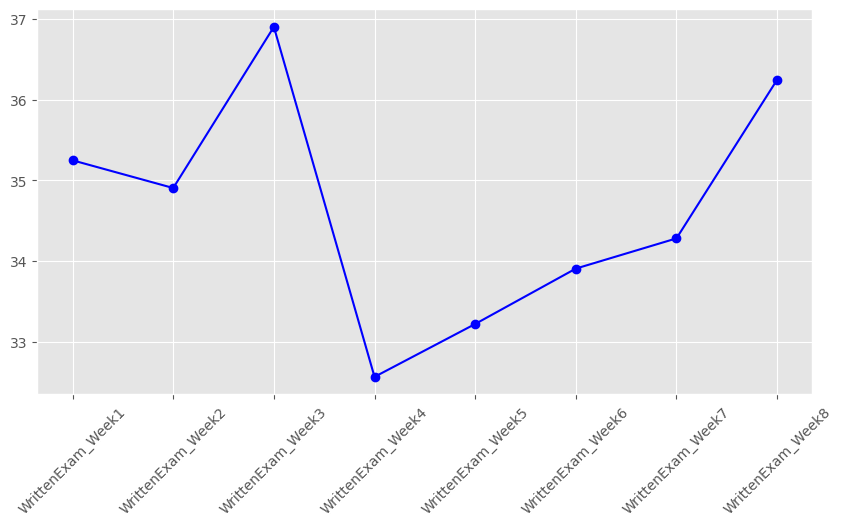

In [24]:
# Exam Trends : 
plt.figure(figsize = (10,5))
plt.plot(weekly_exam_avg.index, weekly_exam_avg.values, marker = 'o', label = 'Exam Trends', color = 'blue')
plt.xticks(rotation = 45)
plt.show()

------

### Step 4 - Marks Distribution and Question paper difficulty analysis

- Understanding marks distribution for each week and overall.
- Skewness - Tells us if the question paper set was too difficult or too easy. 
- Kurtosis - Tells us if the marks are clustered/ spread out. 

#### Overall : 

##### Combined marks : 

In [26]:
# skewness and kurtosis of total marks. 
Overall_skew = skew(df['Total_Marks'])
Overall_kurt = kurtosis(df['Total_Marks'])

print(f"Overall skewness of marks : {Overall_skew}")
print(f"Overall kurtosis of marks : {Overall_kurt}")

Overall skewness of marks : 0.2942086760294644
Overall kurtosis of marks : -0.6395258113852762


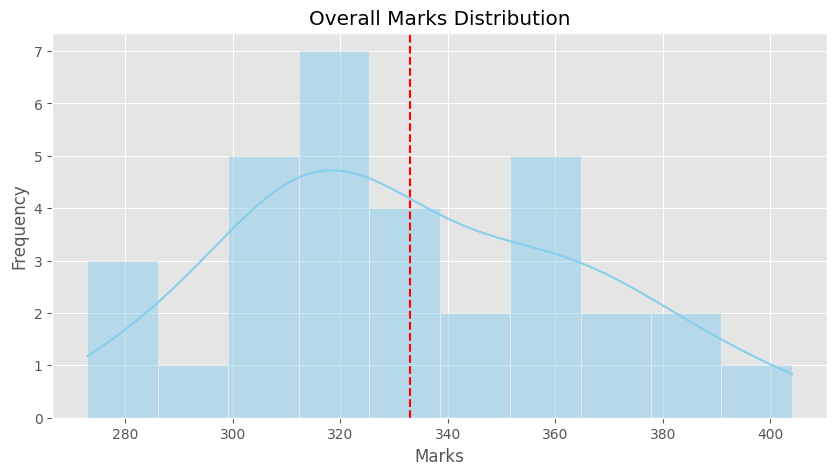

In [ ]:
# Histogram showing the overall marks distribution
plt.figure(figsize =(10,5))
sns.histplot(df['Total_Marks'], kde =True, color= 'skyblue', bins = 10)
plt.axvline(Overall_mean, color ="red", linestyle = "--", label = f"Mean = {Overall_mean:.2f}")
plt.title("Overall Marks Distribution")
plt.xlabel("Marks")
plt.ylabel("Frequency")
plt.show()

* Here the students overall the students have scored less than mean, although the kurtosis indicates that the curve is spread.

##### Assignments : 

In [35]:
Overall_Assignments_skewness = skew(df['Assignment_Total'])
Overall_Assignments_kurtosis = kurtosis(df['Assignment_Total'])
Overall_Assignments_mean = df['Assignment_Total'].mean()

print(f"Overall skewness of Assignment marks : {Overall_Assignments_skewness}")
print(f"Overall kurtosis of Assignment marks : {Overall_Assignments_kurtosis}")
print(f"Overall mean of Assignment marks (out of 80): {Overall_Assignments_mean}")

Overall skewness of Assignment marks : -0.0757803956793268
Overall kurtosis of Assignment marks : -0.8593783420426835
Overall mean of Assignment marks (out of 80): 55.625


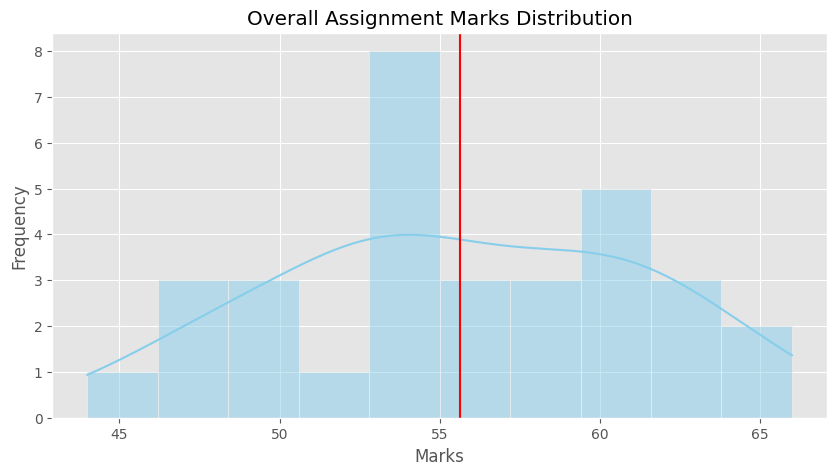

In [37]:
plt.figure(figsize=(10,5))
sns.histplot(df['Assignment_Total'], kde = True, color = 'skyblue', bins= 10)
plt.axvline(Overall_Assignments_mean,label = f"Mean = {Overall_Assignments_mean:.2f}", color = "red")
plt.title("Overall Assignment Marks Distribution")
plt.xlabel("Marks")
plt.ylabel("Frequency")
plt.show()
        

##### Written Exams :

In [32]:
Overall_exam_skewness = skew(df['WrittenExam_Total'])
Overall_exam_kurtosis = kurtosis(df['WrittenExam_Total'])

print(f"Overall skewness of exam marks : {Overall_exam_skewness}")
print(f"Overall kurtosis of exam marks : {Overall_exam_kurtosis}")

Overall skewness of exam marks : 0.37461940634093893
Overall kurtosis of exam marks : -0.38754994885292593
